# **INTRODUCTION**
---

Maksud dan Tujuan Utama dari dataset ini adalah untuk memodelkan bagaimana harga atau tarif taksi bervariasi dengan semua fitur yang telah diberikan

Saya akan melakukan beberapa analisis dan model regresi sederhana berdasarkan dataset uber and lyft fare

# **IMPORT PUSTAKA**
---

In [1]:

import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# for creating labelEncoder
from sklearn import preprocessing

# for splitting data
from sklearn.model_selection import train_test_split

# membuat model
from sklearn.neighbors import KNeighborsClassifier # model KNN

# for evaluting model
from sklearn import metrics # akurasi model

# **DATA LOADING**
---

In [2]:
df_raw = pd.read_csv("rideshare_kaggle.csv")
df = df_raw
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


# **DATA CLEANING**
---

In [3]:
# check total missing values
df.isnull().sum().sum()

55095

In [4]:
# drop missing values
df.dropna(axis=0,inplace=True)

In [5]:
# check total missing values after droping
df.isnull().sum().sum()

0

In [6]:
# check column visibility
df['visibility'].head()

0    10.000
1     4.786
2    10.000
3    10.000
4    10.000
Name: visibility, dtype: float64

In [7]:
# check column visibility.1
df['visibility.1'].head()

0    10.000
1     4.786
2    10.000
3    10.000
4    10.000
Name: visibility.1, dtype: float64

In [8]:
# drop column visibility.1
df = df.drop(['visibility.1'],axis=1)

# **EDA**
---

## 1. Analisis Waktu

### [Data Month]

Kita akan membuat fungsi grouping berdasarkan kolom yang ada di dataframe. Kemudian kita visualisasikan dengan banyaknya data tersebut muncul

In [9]:
def plot_bar(groupby_column):
    df1 = df.groupby(groupby_column).size().reset_index(name="counts")
    fig1 = px.bar(data_frame = df1,
                  x = groupby_column,
                  y = "counts",
                  color = groupby_column,
                  barmode = "group")
    print(df1)
    fig1.show()

Dengan menggunakan fungsi plot_bar(groupby_column), kita akan mengetahui bulan apa saja yang ada dalam data month.

In [10]:
plot_bar('month')

   month  counts
0     11  263771
1     12  374205


Berdasarkan grafik diatas kita hanya memiliki fitur November dan Desember pada data Month. Itu berarti data ini diambil atau direkam pada bulan November dan Desember saja.

### [Data Day]

Jika kita ingin mengetahui jumlah taksi yang beroperasi pada hari-hari tertentu.

Sekali lagi, kita gunakan fungsi plot_bar(groupby_column)

In [11]:
plot_bar('day')

    day  counts
0     1   41680
1     2   41298
2     3   41323
3     4   11627
4     9    1529
5    10    2534
6    13   35496
7    14   41344
8    15   41332
9    16   41359
10   17   41354
11   18   33329
12   26   29028
13   27   70135
14   28   67842
15   29   55222
16   30   41544


Berdasarkan grafik diatas terlihat bahwa kita memiliki banyak jarak pada data Day. Itu berarti kita tidak memiliki data di hari-hari tertentu di setiap bulannya. Dengan kata lain, semua taksi sedang tidak beroperasi di hari-hari tersebut. Taksi yang beroperasi paling tinggi ada di antara hari ke-25 dan hari ke-30.

### [Data Hour]

Setelah kita mengetahui berapa jumlah taksi yang beroperasi di hari-hari tertentu, kita akan mencari tahu berapa lama durasi taksi-taksi tersebut beroperasi.

Gunakan fungsi plot_bar(groupby_column)

In [12]:
plot_bar('hour')

    hour  counts
0      0   29872
1      1   26310
2      2   26323
3      3   25530
4      4   26125
5      5   22995
6      6   25147
7      7   22930
8      8   22337
9      9   26673
10    10   27918
11    11   27946
12    12   28017
13    13   27977
14    14   27976
15    15   27868
16    16   27972
17    17   28075
18    18   27958
19    19   25410
20    20   24620
21    21   25549
22    22   27093
23    23   29355


Berdasarkan grafik di atas terlihat bahwa kita memiliki hampir 24 jam data rekaman. Dengan kata lain, durasi taksi beroperasi paling lama hampir mencapai 24 jam.

## 2. Analisis Titik Keberangkatan dan Titik Tujuan Perjalanan

Selanjutnya kita akan mencari tahu dimana saja titik keberangkatan taksi dengan menggunakan fungsi plot_bar(groupby_column)

In [13]:
plot_bar('source')

                     source  counts
0                  Back Bay   53201
1               Beacon Hill   52841
2         Boston University   53172
3                    Fenway   53166
4        Financial District   54197
5          Haymarket Square   53147
6                 North End   53171
7             North Station   52576
8   Northeastern University   53164
9             South Station   53160
10         Theatre District   53201
11                 West End   52980


Berdasarkan grafik di atas semua jumlah masing-masing fitur source memiliki jumlah yang hampir sama. Ada sekitar 50.000 data pada setiap fitur source.

Sekarang kita akan mengelompokkan data destination dengan plot_bar()

In [14]:
plot_bar('destination')

                destination  counts
0                  Back Bay   53190
1               Beacon Hill   52840
2         Boston University   53171
3                    Fenway   53166
4        Financial District   54192
5          Haymarket Square   53171
6                 North End   53164
7             North Station   52577
8   Northeastern University   53165
9             South Station   53159
10         Theatre District   53189
11                 West End   52992


Sama seperti sebelumnya, ada sekitar 50.000 data pada setiap fitur destination.

Berbeda dengan pengelompokkan sebelumnya, sekarang kita akan mengelompokkan data destination dan source berdasarkan latitude dan longitude

In [15]:
df.groupby(by=["destination","source"]).agg({'latitude':'mean','longitude':'mean'})

latitude  longitude
destination source                                       
Back Bay    Boston University        42.336960 -71.066178
            Fenway                   42.337740 -71.065822
            Haymarket Square         42.337087 -71.065110
            North End                42.338100 -71.066343
            Northeastern University  42.336668 -71.065314
...                                        ...        ...
West End    Fenway                   42.338291 -71.066356
            Haymarket Square         42.339314 -71.066239
            North End                42.337212 -71.066268
            Northeastern University  42.340015 -71.066646
            South Station            42.338983 -71.066967

[72 rows x 2 columns]

Kita akan membuat peta geospasial untuk memvisualisasi data yang titik keberangkatan di Haymarket Square. Kita akan memplot menggunakan cluster bukan marker. Peta yang dirender oleh folium bersifat interaktif, kita dapat menggeser, menarik, dan memperbesar/memperkecil.

In [16]:
# import pustaka yang dibutuhkan untuk membuat peta geospasial
import geopandas as gpd
import folium
from folium.plugins import FastMarkerCluster

# memfilter titik keberangkatan Haymarket Square
df1 = df[df['source']=='Haymarket Square']

# membuat folium map dengan zoom 10
my_map = folium.Map(location=[df1["latitude"].mean(),
                              df1["longitude"].mean()],
                    zoom_start = 10)

# membuat cluster berdasarkan latitude dan longitude
my_map.add_child(FastMarkerCluster(df1[['latitude', 'longitude']].values.tolist(),
                                   color='green'))
my_map

Berdasarkan peta geospasial di atas kita dapat melihat bahwa perjalanan dengan titik keberangkatan Haymarket Square memiliki dua cluster tujuan yang berisi banyak tempat. Untuk melihatnya kita bisa memperbesar peta. Sebagian besar berada di area Boston sebanyak 46256 data pada cluster tersebut.

## 3. Analisis Tipe-Tipe Taksi

Selanjutnya kita akan mencari tahu tipe-tipe taksi yang beroperasi dalam data.

Kita akan gunakan fungsi plot_bar(groupby_column)

In [17]:
plot_bar('cab_type')

  cab_type  counts
0     Lyft  307408
1     Uber  330568


Berdasarkan grafik diatas kita memiliki data uber lebih banyak daripada data lyft. Perbedaannya tidak terlalu besar, masing-masing tipe taksi memiliki sekitar 300.000 data.

Kita akan melihat jumlah tipe-tipe taksi yang beroperasi setiap harinya

In [18]:
# grouping berdasarkan day dan cab_type
df2 =df.groupby(by=["day","cab_type"]).size().reset_index(name="counts")

# tampilkan df2 dalam bentuk barplot
fig2 = px.bar(data_frame=df2,
              x="day",
              y="counts",
              color="cab_type",
              barmode="group")
fig2.show()

Berdasarkan grafik di atas kedua tipe taksi banyak beroperasi di antara hari ke-25 sampai hari ke-30

Mari kita mencari tahu berapa lama durasi kedua tipe taksi tersebut beroperasi

In [19]:

df3 = df.groupby(["hour","cab_type"]).size().reset_index(name="counts")


fig3 = px.bar(data_frame = df3,
              x = "hour",
              y = "counts",
              color = "cab_type",
              barmode = "group")
fig3.show()

Dapat disimpulkan bahwa uber adalah tipe taksi yang sering dipesan dibandingkan lyft. Berdasarkan grafik-grafik diatas taksi uber lebih sering beroperasi setiap hari dan setiap jamnya.

## 4. Analisis Tarif Taksi

Kita dapat melihat rata-rata dari data harga di setiap rute (keberangkatan-tujuan) melalui tabel berikut

In [20]:
pd.set_option('display.max_rows', 72)
df.groupby(by=["source","destination"]).price.agg(["mean"])

mean
source                  destination                       
Back Bay                Boston University        14.039392
                        Fenway                   13.658752
                        Haymarket Square         17.987384
                        North End                19.473019
                        Northeastern University  13.151040
                        South Station            17.700711
Beacon Hill             Boston University        16.376737
                        Fenway                   16.158840
                        Haymarket Square         13.799137
                        North End                15.270942
                        Northeastern University  16.471792
                        South Station            15.950661
Boston University       Back Bay                 13.992801
                        Beacon Hill              17.315535
                        Financial District       24.146085
                        North Station            20.185338
                        Theatre District         18.689557
                        West End                 18.611766
Fenway                  Back Bay                 13.802155
                        Beacon Hill              16.796674
                        Financial District       23.438818
                        North Station            19.701839
                        Theatre District         18.232722
                        West End                 18.161806
Financial District      Boston University        25.498434
                        Fenway                   23.404850
                        Haymarket Square         13.188209
                        North End                13.179635
                        Northeastern University  21.918584
                        South Station            12.349066
Haymarket Square        Back Bay                 16.860489
                        Beacon Hill              13.338559
                        Financial District       12.731618
                        North Station            12.332545
                        Theatre District         13.677272
                        West End                 12.529855
North End               Back Bay                 19.550935
                        Beacon Hill              15.982630
                        Financial District       13.417597
                        North Station            12.824092
                        Theatre District         15.169406
                        West End                 13.494873
North Station           Boston University        18.931558
                        Fenway                   18.547603
                        Haymarket Square         12.571791
                        North End                13.106641
                        Northeastern University  19.537848
                        South Station            15.374198
Northeastern University Back Bay                 13.698923
                        Beacon Hill              16.842433
                        Financial District       22.582094
                        North Station            19.910939
                        Theatre District         16.144805
                        West End                 18.204155
South Station           Back Bay                 19.103822
                        Beacon Hill              17.276304
                        Financial District       12.436910
                        North Station            15.746736
                        Theatre District         13.952579
                        West End                 15.881172
Theatre District        Boston University        20.360662
                        Fenway                   19.069278
                        Haymarket Square         15.204973
                        North End                15.159646
                        Northeastern University  16.910751
                        South Station            12.888926
West End                Boston University 

Kita juga bisa melihat harga maksimum dari data harga

In [21]:
print('Maximum price in our data :',df.price.max())
df[df['price']==df.price.max()]

Maximum price in our data : 97.5


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
597071,ba1593a1-e4fd-4c7a-a011-e2d4fccbf081,1.543714e+09,1,2,12,2018-12-02 01:28:02,America/New_York,Financial District,Fenway,Lyft,...,0.0,1543683600,31.57,1543665600,44.65,1543690800,28.1,1543658400,43.98,1543690800


In [22]:
df[df['price']==df.price.max()][['latitude','longitude']]

,latitude,longitude
597071,42.3503,-71.081


Kita mendapatkan tarif taksi tertinggi sebanyak 97.5 dolar dari titik keberangkatan di Financial District menuju ke Fenway. Untuk mengetahui seberapa jauh rute ini, kita akan memplot peta dari kedua tempat tersebut menggunakan folium.

In [23]:
# membuat peta folium
map1 = folium.Map(location=(42.3503,-71.081),zoom_start = 10)

# buat marker titik tujuan
folium.Marker(location=(42.3503,-71.081)).add_to(map1) # Fenway

# buat marker titik keberangkatan
folium.Marker(location=(42.3378,-71.066)).add_to(map1) # Financial District
display(map1)

Sepertinya jarak diantara kedua tempat tersebut tidak terlalu jauh. Dengan kata lain, kedua tempat tersebut masih dalam wilayah Boston bukan di luar Boston. Jadi kemungkinannya ada outlier karena kita tidak memiliki informasi mengenai durasi perjalanan rute tersebut. Oleh karena itu, kita harus mengecek data lainnya dengan rute yang sama.

In [24]:
df_group = df.groupby(by=["source","destination"]).price.agg(["mean"]).reset_index()

df_group[(df_group['source']=='Financial District')& (df_group['destination']=='Fenway')]

,source,destination,mean
25,Financial District,Fenway,23.40485


Rata-rata dari data harga rute tersebut adalah 23.4 dolar yang mana jauh dari data harga maksimum yaitu 97.5 dolar. Maka kemungkinan itu adalah outlier. Kita akan menghapusnya

In [25]:
# filtering harga yang bukan harga maksimum
df = df.loc[df['price']!=df.price.max()]

In [26]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


# **DATA PREPROCESSING**
---

## *1. Hapus Fitur yang Tidak Berguna*

Kita akan menghapus beberapa fitur yang tidak digunakan dengan membuat dataframe baru.

In [27]:
# For further modelling i don't think we need date related features. But maybe we need them in the future analysis.
# so i will make new dataframe

ddf = df.drop(['id','timestamp','datetime','long_summary',
               'apparentTemperatureHighTime','apparentTemperatureLowTime',
               'apparentTemperatureLowTime','windGustTime',
               'sunriseTime','sunsetTime','uvIndexTime',
               'temperatureMinTime','temperatureMaxTime',
               'apparentTemperatureMinTime','temperatureLowTime',
               'apparentTemperatureMaxTime'],axis=1)

In [28]:
ddf.shape

(637975, 41)

### Korelasi Fitur-Fitur Temperature dengan Price
---

Tujuan kita saat ini membuat model linear regression. Pertama-tama, kita akan memeriksa korelasi fitur yang berkaitan dengan temperatur dan target fitur yaitu Price.

In [29]:
temp_cols= ['temperature','apparentTemperature','temperatureHigh',
            'temperatureLow','apparentTemperatureHigh',
            'apparentTemperatureLow','temperatureMin',
            'temperatureHighTime','temperatureMax',
            'apparentTemperatureMin','apparentTemperatureMax',
            'price']

In [30]:
df_temp = ddf[temp_cols]
df_temp.head()

,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07,5.0
1,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92,11.0
2,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,31.04,44.12,7.0
3,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,30.30,38.53,26.0
4,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.11,35.75,9.0


<AxesSubplot: >

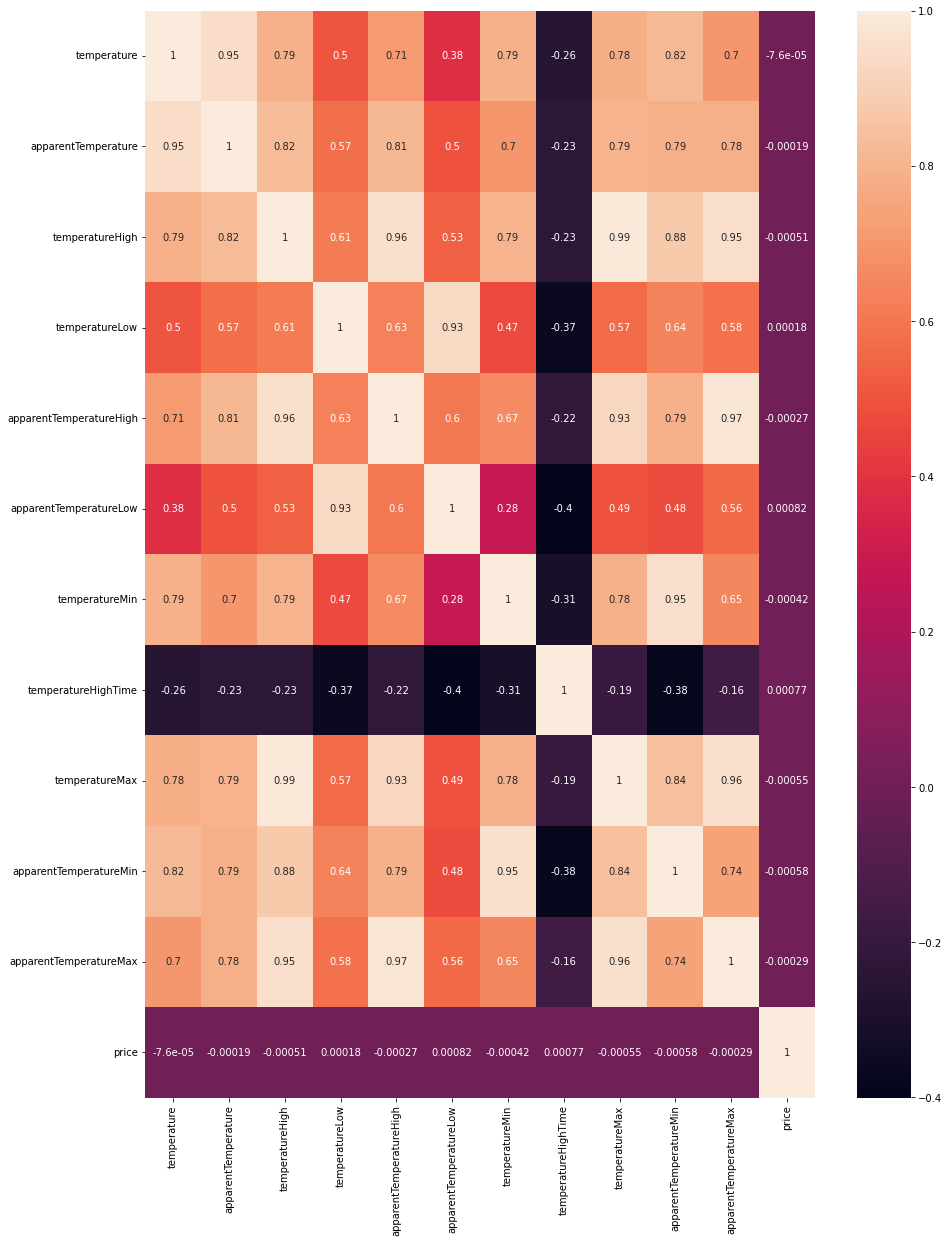

In [31]:
plt.figure(figsize=(15,20))
sns.heatmap(df_temp.corr(),annot=True)

Berdasarkan heatmap diatas semua fitur yang berkaitan dengan temperatur memiliki korelasi yang lemah dengan target fitur kita yaitu price.

Lalu kita akan menghapus semua yang tidak memberi dampak apapun terhadap model regresi kita.

In [32]:
ddf = ddf.drop(['temperature','apparentTemperature','temperatureHigh',
                'temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin',
                'temperatureHighTime','temperatureMax',
                'apparentTemperatureMin','apparentTemperatureMax'],axis=1)
ddf.shape

(637975, 30)

### Korelasi Fitur-Fitur Climate dengan Price
---

Kedua, kita akan memeriksa korelasi fitur yang berkaitan dengan climate dan target fitur yaitu Price.

In [33]:
climate_column = ['precipIntensity', 'precipProbability',
                  'humidity', 'windSpeed', 'windGust',
                  'visibility', 'dewPoint', 'pressure',
                  'windBearing','cloudCover', 'uvIndex', 'ozone',
                  'moonPhase','precipIntensityMax','price']
df_clim = ddf[climate_column]
df_clim.head()

,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,price
0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,303.8,0.30,0.1276,5.0
1,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,291.1,0.64,0.1300,11.0
2,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,315.7,0.68,0.1064,7.0
3,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,291.1,0.75,0.0000,26.0
4,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,347.7,0.72,0.0001,9.0


<AxesSubplot: >

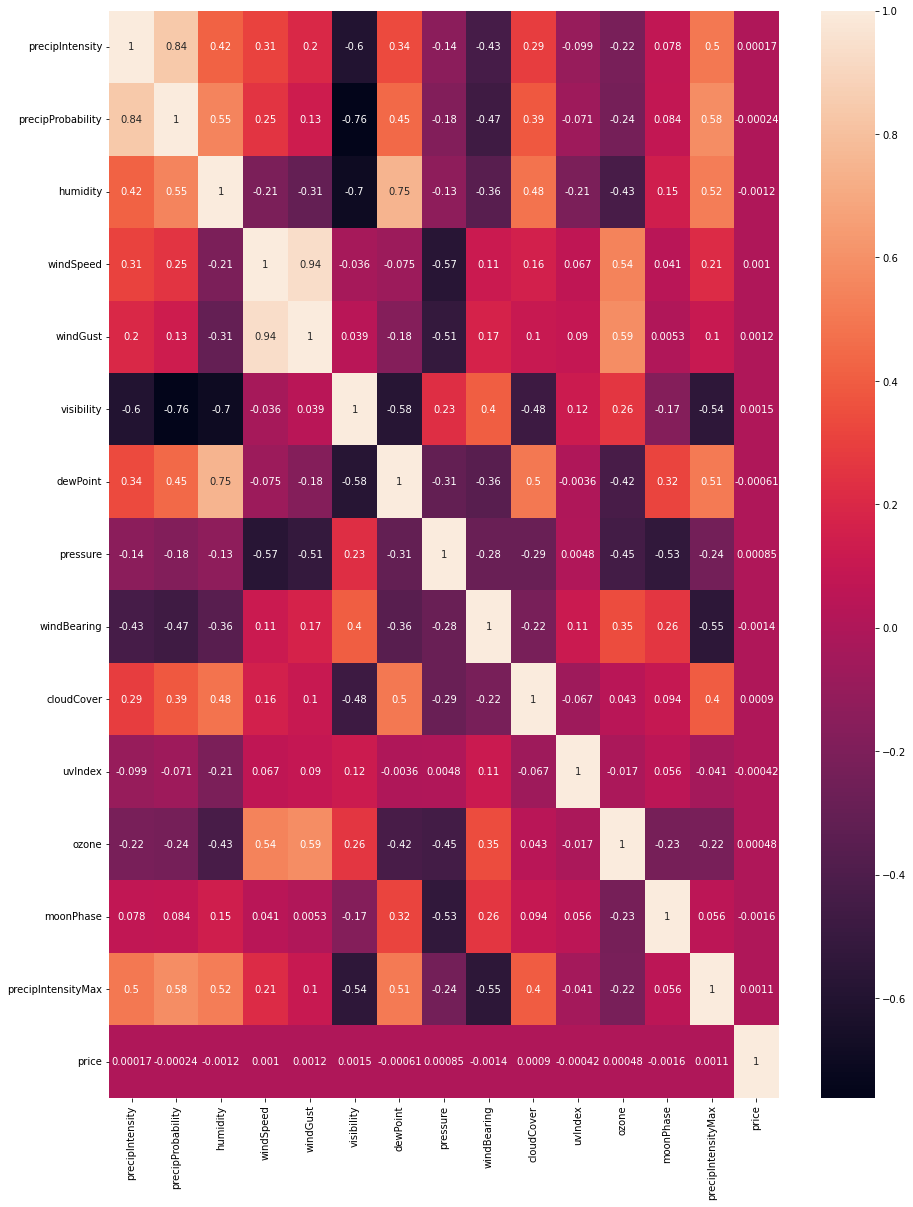

In [34]:
plt.figure(figsize=(15,20))
sns.heatmap(df_clim.corr(),annot=True)

Seperti sebelumnya, semua fitur yang berkaitan dengan climate juga memiliki korelasi yang lemah dengan fitur target kita yaitu price.

Sekali lagi, kita hapus semua fitur yang tidak membuat dampak apapun terhadap model regresi kita.

In [35]:
ddf = ddf.drop(['precipIntensity', 'precipProbability', 'humidity',
                'windSpeed','windGust', 'visibility', 'dewPoint',
                'pressure', 'windBearing','cloudCover', 'uvIndex',
                'ozone', 'moonPhase','precipIntensityMax'],axis=1)
ddf.shape

(637975, 16)

### Cek Nilai Kategorikal dalam Fitur-Fitur Dataset
---

Ketiga, kita akan memeriksa nilai categorical yang ada di dalam fitur-fitur dataset.

In [36]:
category_col = ddf.select_dtypes(include=['object','category']).columns.tolist()
for column in ddf[category_col]:
    print(f'{column} : {ddf[column].unique()}')
    print()

timezone : ['America/New_York']

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

product_id : ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2']

name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']

short_summary : [' Mostly Cloudy ' ' Rain ' ' Clear ' ' Partly Clou

Kita dapat melihat bahwa fitur timezone hanya memiliki 1 nilai saja dan fitur product_id berisi banyak nilai-nilai yang tidak terdefinisi.

Mari kita hapus fitur-fitur itu

In [37]:
ddf = ddf.drop(['timezone','product_id'],axis=1)

ddf.shape

(637975, 14)

### Korelasi Fitur-Fitur Categorical dengan Price
---

Keempat, kita akan memeriksa korelasi fitur-fitur categorical dengan target fitur yaitu Price.

In [38]:
new_cat = ['source','destination','cab_type','name','short_summary',
           'icon','price']

df_cat = ddf[new_cat]
df_cat.head()

,source,destination,cab_type,name,short_summary,icon,price
0,Haymarket Square,North Station,Lyft,Shared,Mostly Cloudy,partly-cloudy-night,5.0
1,Haymarket Square,North Station,Lyft,Lux,Rain,rain,11.0
2,Haymarket Square,North Station,Lyft,Lyft,Clear,clear-night,7.0
3,Haymarket Square,North Station,Lyft,Lux Black XL,Clear,clear-night,26.0
4,Haymarket Square,North Station,Lyft,Lyft XL,Partly Cloudy,partly-cloudy-night,9.0


In [39]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_cat_encode= df_cat.copy()
for col in df_cat_encode.select_dtypes(include='O').columns:
    df_cat_encode[col]=le.fit_transform(df_cat_encode[col])

In [40]:
df_cat_encode

,source,destination,cab_type,name,short_summary,icon,price
0,5,7,0,7,4,5,5.0
1,5,7,0,2,8,6,11.0
2,5,7,0,5,0,1,7.0
3,5,7,0,4,0,1,26.0
4,5,7,0,6,6,5,9.0
...,...,...,...,...,...,...,...
693065,11,6,1,11,6,5,9.5
693066,11,6,1,10,6,5,13.0
693067,11,6,1,9,6,5,9.5
693069,11,6,1,1,6,5,27.0


<AxesSubplot: >

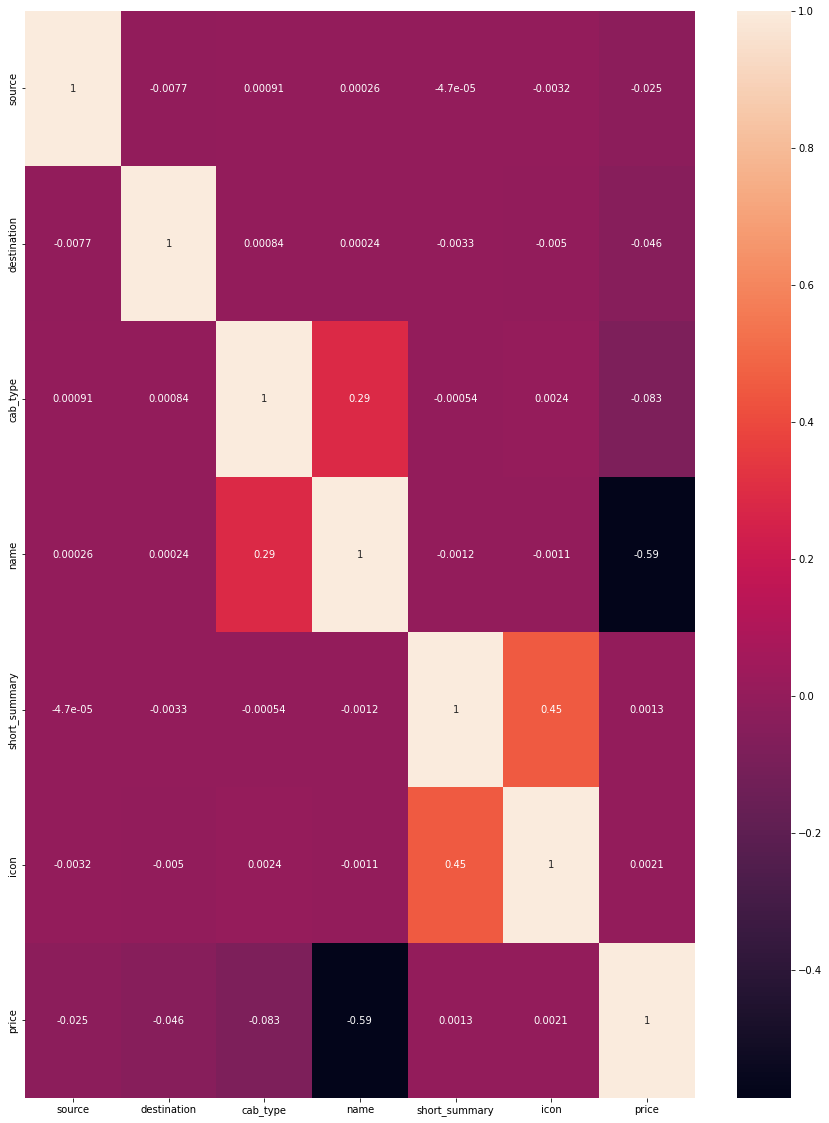

In [41]:
plt.figure(figsize=(15,20))
sns.heatmap(df_cat_encode.corr(),annot=True)

Berdasarkan heatmap diatas hanya fitur name yang memiliki korelasi yang relatif kuat daripada fitur-fitur lainnya. Fitur-fitur yang memiliki korelasi yang relatif lemah yaitu source, destination, dan cab_type.

Kita akan menghapus fitur-fitur yang memiliki korelasi yang relatif lemah kecuali cab_type. Fitur cab_type memiliki korelasi yang lebih kuat daripada 2 fitur lainnya.

In [42]:
ddf = ddf.drop(['source','destination','short_summary','icon'],axis=1)

ddf.head()

,hour,day,month,cab_type,name,price,distance,surge_multiplier,latitude,longitude
0,9,16,12,Lyft,Shared,5.0,0.44,1.0,42.2148,-71.033
1,2,27,11,Lyft,Lux,11.0,0.44,1.0,42.2148,-71.033
2,1,28,11,Lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033
3,4,30,11,Lyft,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033
4,3,29,11,Lyft,Lyft XL,9.0,0.44,1.0,42.2148,-71.033


Selain itu, kita akan menghapus beberapa fitur seperti hour, day,month, latitude, longitude karena kita tidak membutuhkan mereka untuk saat ini

In [43]:
ddf = ddf.drop(['hour','day','month','latitude','longitude'],axis=1)

ddf.head()

,cab_type,name,price,distance,surge_multiplier
0,Lyft,Shared,5.0,0.44,1.0
1,Lyft,Lux,11.0,0.44,1.0
2,Lyft,Lyft,7.0,0.44,1.0
3,Lyft,Lux Black XL,26.0,0.44,1.0
4,Lyft,Lyft XL,9.0,0.44,1.0


In [44]:
ddf.columns

Index(['cab_type', 'name', 'price', 'distance', 'surge_multiplier'], dtype='object')

## *2. Hapus Outliers*

Sebelumnya kita sudah menghapus outliers pada fitur price berdasarkan harga maksimum. Sekarang kita akan memeriksa outlier lain yang kemunginan ada

Kita akan menggunakan metode Interquartil Range (IQR) untuk memeriksa batas atas dan batas bawah pencilan

In [45]:
Qp12 = ddf['price'].quantile(0.25)
Qp32 = ddf['price'].quantile(0.75)
IQRp = Qp32-Qp12

In [46]:
# harga yang melebihi batas atas
ddf[ddf['price']>(Qp32+(1.5*IQRp))]

,cab_type,name,price,distance,surge_multiplier
706,Lyft,Lux Black,52.5,3.25,2.00
707,Lyft,Lux Black XL,67.5,3.25,2.00
769,Lyft,Lux Black XL,45.5,4.76,1.00
1094,Lyft,Lux Black XL,45.5,4.31,1.00
1318,Lyft,Lux Black XL,45.5,5.33,1.00
...,...,...,...,...,...
692439,Uber,Black SUV,47.0,5.56,1.00
692698,Lyft,Lux Black XL,52.5,4.58,1.25
692891,Lyft,Lux Black XL,47.5,5.42,1.00
692962,Uber,Black SUV,51.0,7.36,1.00


In [47]:
# harga yang melebihi batas bawah
ddf[ddf['price']<(Qp12-(1.5*IQRp))]

,cab_type,name,price,distance,surge_multiplier


Dapat kita simpulkan bahwa kita memiliki 5588 data outliers. Lalu kita akan menghapusnya.

In [48]:
print('Size before removing :',ddf.shape)
ddf= ddf[~((ddf['price']>(Qp32+(1.5*IQRp))))]
print('Size after removing :',ddf.shape)

Size before removing : (637975, 5)
Size after removing : (632387, 5)


# **PENDEFINISIAN MODEL**
---

## *1. Encoding Data*

In [49]:
def one_hot_encoder(data,feature,keep_first=True):

    one_hot_cols = pd.get_dummies(data[feature])
    
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col},axis=1,inplace=True)
    
    new_data = pd.concat([data,one_hot_cols],axis=1)
    new_data.drop(feature,axis=1,inplace=True)
    
    if keep_first == False:
        new_data=new_data.iloc[:,1:]
    
    return new_data

In [50]:
ddf_onehot = ddf.copy()
for col in ddf_onehot.select_dtypes(include='O').columns:
    ddf_onehot=one_hot_encoder(ddf_onehot,col)
    
ddf_onehot.head()

,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,11.0,0.44,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7.0,0.44,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,26.0,0.44,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,9.0,0.44,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


## *2. Splitting Data*

Pilih fitur yang akan digunakan sebagai input dan target prediksi.

In [57]:
# prepare the training set and testing set

# memilih semua fitur kecuali fitur target
x = ddf_onehot.drop(columns=['price'],axis=1).values
# memilih fitur target
y = ddf_onehot['price'].values

In [58]:
print('size of x = {0}'.format(x.shape))
print('size of y = {0}'.format(y.shape))
print(x.shape != y.shape)

size of x = (632387, 16)
size of y = (632387,)
True


Tahapan selanjutnya adalah melakukan pemisahan data untuk training dan testing. Mengapa ini penting? Hal ini diperlukan agar kita bisa melihat bagaimana algoritma belajar untuk melakukan prediksi pada testing data. Kita akan membagi data menjadi 70% training dan 30% testing menggunakan fungsi train_test_split() dari sklearn.model_selection.

In [59]:
from sklearn.model_selection import train_test_split

# split the data into 70% training and 30% testing
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=0)

# **PELATIHAN MODEL**
---

Setelah melakukan pemisahan data untuk training dan testing, langkah berikutnya yaitu melakukan train pada data

Sekarang kita akan memasukkan x dan y kita ke dalam model machine learning untuk memprediksi hasilnya, tetapi sebelum itu, kita harus mengimpor LinearRegression dari sklearn.linear_model dan membuat objek dari kelas LinearRegression.

In [60]:
from sklearn.model_selection import cross_val_score

def get_cv_scores(model):
    scores = cross_val_score(model,
                             x_train,
                             y_train,
                             cv=10,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [61]:
from sklearn.linear_model import LinearRegression

# model regression
LR = LinearRegression().fit(x_train, y_train)
get_cv_scores(LR)

CV Mean:  0.9332305173791807
STD:  0.000664919547291098




In [62]:
print(LR.intercept_)
print(LR.coef_)

145764831871.8848
[ 2.66634145e+00  1.36639340e+01 -1.73539272e+11 -1.00712846e+11
 -4.50519861e+10 -4.50519861e+10  2.77744401e+10  2.77744402e+10
  2.77744402e+10  2.77744401e+10  2.77744401e+10  2.77744401e+10
 -4.50519861e+10 -4.50519861e+10 -4.50519861e+10 -4.50519861e+10]


Saatnya kita membuat beberapa prediksi. Untuk melakukannya, kita akan menggunakan data pengujian kita dan melihat seberapa akurat algoritme kita memprediksi skor persentase.

Sekarang prediksi output dengan variabel x_test.

In [68]:
# target prediction
y_pred = LR.predict(x_test)
y_pred

array([30.69268799, 37.47784424,  8.28656006, ..., 13.09359741,
        9.09204102, 15.44812012])

Sekarang mari kita uji keakuratan model kita

In [69]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
r2

0.9337792677542667

In [65]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
rmse

2.260167058468962

In [66]:
# printing values
print('Slope :' , LR.coef_)
print('Intercept :', LR.intercept_)
print('Root mean squared error : ', rmse)
print('R2 score : ', r2)

Slope : [ 2.66634145e+00  1.36639340e+01 -1.73539272e+11 -1.00712846e+11
 -4.50519861e+10 -4.50519861e+10  2.77744401e+10  2.77744402e+10
  2.77744402e+10  2.77744401e+10  2.77744401e+10  2.77744401e+10
 -4.50519861e+10 -4.50519861e+10 -4.50519861e+10 -4.50519861e+10]
Intercept : 145764831871.8848
Root mean squared error :  2.260167058468962
R2 score :  0.9337792677542667


ValueError: x and y must be the same size

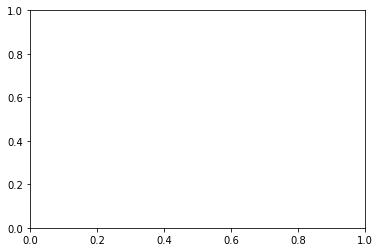

In [67]:
plt.scatter(x_train, y_train)
plt.plot(x_test, y_pred, color='red')
plt.show()

## *3. Finding Best Model*

In [70]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,ShuffleSplit

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

import warnings
warnings.filterwarnings('ignore')

find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.933465,{'normalize': False}
1,decision_tree,0.964468,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


# **PENGAMBILAN KESIMPULAN**
---